In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
data = load_breast_cancer()

In [ ]:
data.data.shape

(569, 30)

In [ ]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

# Como vemos acima, é um problema de classificação binária

In [ ]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

# Dividindo entre treino e teste

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.33)

In [ ]:
N, D = X_train.shape
print(X_train.shape)

(381, 30)


# Pré Processamento dos dados

In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Criando modelo

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(D,)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [ ]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50)

Epoch 1/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 139ms/step - accuracy: 0.9635 - loss: 0.1305 - val_accuracy: 0.9628 - val_loss: 0.1455
Epoch 2/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9542 - loss: 0.1465 - val_accuracy: 0.9628 - val_loss: 0.1411
Epoch 3/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9587 - loss: 0.1364 - val_accuracy: 0.9628 - val_loss: 0.1371
Epoch 4/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9730 - loss: 0.1273 - val_accuracy: 0.9681 - val_loss: 0.1335
Epoch 5/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9756 - loss: 0.1171 - val_accuracy: 0.9681 - val_loss: 0.1303
Epoch 6/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9767 - loss: 0.1114 - val_accuracy: 0.9734 - val_loss: 0.1273
Epoch 7/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9769 - loss: 0.1062 - val_accuracy: 0.9734 - val_loss: 0.1247
Epoch 8/50
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9701 - loss: 0.1145 - val_accuracy: 0.9734 - 

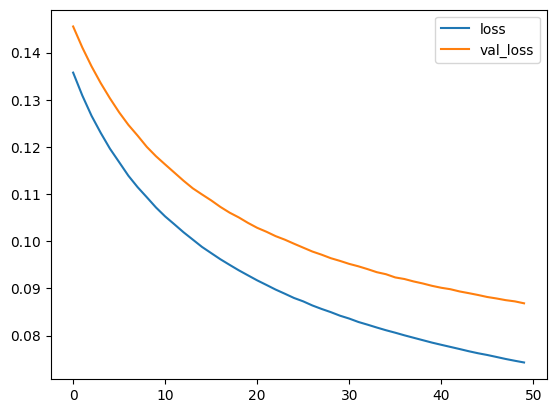

In [ ]:
plt.plot(model.history.history['loss'], label='loss')
plt.plot(model.history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()
plt.show()

# **Predictions**

In [ ]:
P = model.predict(X_test)
print(P)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step 
[[9.9442744e-01]
 [9.4471198e-01]
 [9.9934179e-01]
 [9.4811666e-01]
 [4.4442993e-04]
 [9.8868620e-01]
 [5.1275583e-06]
 [1.0775093e-03]
 [9.8648667e-01]
 [8.5517383e-01]
 [9.8828828e-01]
 [9.7828680e-01]
 [9.6042055e-01]
 [9.9553204e-01]
 [9.8610014e-01]
 [9.9956518e-01]
 [9.9760395e-01]
 [2.0069267e-06]
 [3.3252236e-02]
 [9.9479997e-01]
 [2.7968874e-05]
 [3.5745561e-01]
 [1.6781403e-03]
 [9.9699271e-01]
 [9.4546616e-01]
 [9.4215131e-01]
 [8.2148328e-02]
 [9.0404731e-01]
 [3.7392157e-03]
 [1.8566976e-04]
 [8.9345694e-01]
 [9.9858969e-01]
 [6.7883307e-01]
 [6.2014180e-05]
 [9.8470948e-04]
 [5.6946808e-01]
 [1.1857569e-01]
 [2.4262902e-04]
 [4.1684166e-02]
 [4.9547702e-02]
 [9.9334961e-01]
 [2.6526792e-02]
 [9.8218703e-01]
 [6.1171916e-09]
 [1.0309239e-04]
 [9.7785238e-04]
 [9.7024685e-01]
 [9.9920219e-01]
 [9.1456741e-01]
 [9.9592042e-01]
 [9.9633211e-01]
 [9.9941254e-01]
 [6.6504020e-09]
 [9.9904066e-01]
 [8.8524127e-01]
 [6.4412311e-02]
 [9.980974

In [ ]:
import numpy as np

P = np.round(P).flatten()
print(P)

[1. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 0. 1. 0. 0. 0. 1.
 1. 1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1. 1.
 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1.
 1. 1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0. 0.
 1. 1. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0.
 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1.
 1. 0. 1. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0.]


In [ ]:
print('Acurácia: ', model.evaluate(X_test, y_test))

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.9823 - loss: 0.0716 
Acurácia:  [0.08682876080274582, 0.9734042286872864]


# **Salvando e carregando um modelo**

In [ ]:
model.save('linear_classification.h5')

In [ ]:
!ls -lh

total 24K
-rw-r--r-- 1 root root  18K Feb  6 18:20 linear_classification.h5
drwxr-xr-x 1 root root 4.0K Feb  5 14:21 sample_data


In [ ]:
model_new = tf.keras.models.load_model('linear_classification.h5')
print(model_new.summary())
model.evaluate(X_test, y_test)

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 1)                   │              31 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 33 (136.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

None
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.9823 - loss: 0.0716


[0.08682876080274582, 0.9734042286872864]